# Nearest Neighbor Distances Between Stations

In [2]:
# import the dependencies
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import BallTree

In [3]:
CSV_PATH = os.path.join("static", "data", "csv")
IMG_PATH = os.path.join("static", "img")
FILE_NAME = "full_inventory.csv"
FILE_PATH = os.path.join(CSV_PATH, FILE_NAME)

In [4]:
# Read in the inventory file
# because 'NA' is the code for North America, we need to change pandas.read_csv default behavior
# for reading missing values (na's)...

df = pd.read_csv(FILE_PATH, keep_default_na=False, na_values=['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan',
    '1.#IND', '1.#QNAN', 'N/A', 'NULL', 'NaN', 'n/a', 'nan',
    'null'], nrows=3)
df.head()

,station_id,latitude,longitude,element,first_year,last_year,years,elevation,state,name,gsn_flag,hcn_crn_flag,wmo_id,state_name,country_code,country,continent_code,continent,type
0,ACW00011604,17.1167,-61.7833,TMAX,1949,1949,1,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN,NaN,AC,Antigua and Barbuda,NA,North America,W
1,ACW00011604,17.1167,-61.7833,TMIN,1949,1949,1,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN,NaN,AC,Antigua and Barbuda,NA,North America,W
2,ACW00011604,17.1167,-61.7833,PRCP,1949,1949,1,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN,NaN,AC,Antigua and Barbuda,NA,North America,W


In [5]:
dtypes = {'station_id': str, 'latitude': np.float64, 'longitude': np.float64, 'first_year': np.int64, 'last_year': np.int64,\
          'year': np.int64, 'elevation': np.float64, 'state': str, 'name': str, 'gsn_flag': str, 'hcn_crn_flag': str,\
          'wmo_id': str, 'state_name': str, 'country_code': str, 'country': str, 'continent_code': str, 'continent': str,\
          'type': str}

df = pd.read_csv(FILE_PATH, keep_default_na=False, dtype = dtypes, na_values=['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan',
    '1.#IND', '1.#QNAN', 'N/A', 'NULL', 'NaN', 'n/a', 'nan',
    'null'])

In [6]:
df.shape

(684293, 19)

In [7]:
df.head()

,station_id,latitude,longitude,element,first_year,last_year,years,elevation,state,name,gsn_flag,hcn_crn_flag,wmo_id,state_name,country_code,country,continent_code,continent,type
0,ACW00011604,17.1167,-61.7833,TMAX,1949,1949,1,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN,NaN,AC,Antigua and Barbuda,NA,North America,W
1,ACW00011604,17.1167,-61.7833,TMIN,1949,1949,1,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN,NaN,AC,Antigua and Barbuda,NA,North America,W
2,ACW00011604,17.1167,-61.7833,PRCP,1949,1949,1,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN,NaN,AC,Antigua and Barbuda,NA,North America,W
3,ACW00011604,17.1167,-61.7833,SNOW,1949,1949,1,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN,NaN,AC,Antigua and Barbuda,NA,North America,W
4,ACW00011604,17.1167,-61.7833,SNWD,1949,1949,1,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN,NaN,AC,Antigua and Barbuda,NA,North America,W


In [25]:
# helper function to return all stations reporting a given element in a given year on a given continent:

def query_by_year_and_element(df, year, element, continent):
    return df[(df.element == element) & (df.first_year <= year) & (df.last_year >= year) & (df.continent == continent)].reset_index()

In [26]:
tmax_1980_na = query_by_year_and_element(df, 1980, 'PRCP', 'North America')

In [27]:
tmax_1980_na.shape

(16495, 20)

In [28]:
tmax_1980_na.head()

,index,station_id,latitude,longitude,element,first_year,last_year,years,elevation,state,name,gsn_flag,hcn_crn_flag,wmo_id,state_name,country_code,country,continent_code,continent,type
0,62846,BB000078954,13.0670,-59.4830,PRCP,1973,2018,46,52.0,NaN,GRANTLEY ADAMS,GSN,NaN,78954.0,NaN,BB,Barbados,NA,North America,0
1,62904,BDM00078016,32.3667,-64.6833,PRCP,1949,2019,71,6.1,NaN,L F WADE INTL AP KINDLEY FLD,GSN,NaN,78016.0,NaN,BD,Bermuda [United Kingdom],NA,North America,M
2,62957,BF000078073,25.0500,-77.4670,PRCP,1973,2019,47,5.0,NaN,NASSAU AIRPORT NEW,GSN,NaN,78073.0,NaN,BF,"Bahamas, The",NA,North America,0
3,63161,BHM00078583,17.5390,-88.3080,PRCP,1960,2019,60,4.6,NaN,PHILIP S W GOLDSON INTL,NaN,NaN,78583.0,NaN,BH,Belize,NA,North America,M
4,70701,CA001010235,48.4000,-123.4833,PRCP,1971,1995,25,17.0,BC,ALBERT HEAD,NaN,NaN,NaN,BRITISH COLUMBIA,CA,Canada,NA,North America,0


In [13]:
# Make a BallTree of the stations:

bt = BallTree(np.deg2rad(tmax_1980_na[['latitude', 'longitude']].values), metric='haversine')

In [49]:
def get_nearest_neighbor_distance(data_frame):
    """
    For each station, find the closest station using geodesic distance.  Returns a 
    copy of the df with added columns `nn_dist` and `nn_station`.
    """
    #
    nn_dist = []
    nn_station = []
    num_rows = data_frame.shape[0]

    for row in range(num_rows):
        # For each row in the data frame, construct a ball_tree to search for nearest neighbors
        df_minus_row = data_frame.drop([row])
        ball_tree = BallTree(np.deg2rad(df_minus_row[['latitude', 'longitude']].values), metric='haversine')
        
        # The query point is the point dropped from the tree
        query_lat = [data_frame.latitude[row]]
        query_lon = [data_frame.longitude[row]]
        
        distance, index = ball_tree.query(np.deg2rad(np.c_[query_lat, query_lon]))
        
        distance = distance[0,0] * 6371000/1000  # multiply by Earth radius to get kilometers
        index = index[0, 0]
        nn_station.append(df_minus_row.station_id.iloc[index])
        nn_dist.append(distance)
            
    df_copy = data_frame.copy()
    df_copy['nn_dist'] = nn_dist
    df_copy['nn_station'] = nn_station
    return df_copy

In [50]:
tmp = get_nearest_neighbor_distance(tmax_1980_na)

In [51]:
tmp.head()

,index,station_id,latitude,longitude,element,first_year,last_year,years,elevation,state,...,hcn_crn_flag,wmo_id,state_name,country_code,country,continent_code,continent,type,nn_dist,nn_station
0,62846,BB000078954,13.0670,-59.4830,PRCP,1973,2018,46,52.0,NaN,...,NaN,78954.0,NaN,BB,Barbados,NA,North America,0,235.901471,MBM00078925
1,62904,BDM00078016,32.3667,-64.6833,PRCP,1949,2019,71,6.1,NaN,...,NaN,78016.0,NaN,BD,Bermuda [United Kingdom],NA,North America,M,1059.098441,USW00093729
2,62957,BF000078073,25.0500,-77.4670,PRCP,1973,2019,47,5.0,NaN,...,NaN,78073.0,NaN,BF,"Bahamas, The",NA,North America,0,280.677978,USW00092811
3,63161,BHM00078583,17.5390,-88.3080,PRCP,1960,2019,60,4.6,NaN,...,NaN,78583.0,NaN,BH,Belize,NA,North America,M,83.597342,MXN00023018
4,70701,CA001010235,48.4000,-123.4833,PRCP,1971,1995,25,17.0,BC,...,NaN,NaN,BRITISH COLUMBIA,CA,Canada,NA,North America,0,4.131491,CA001015107


In [52]:
tmp.nn_dist.describe()

count    16495.000000
mean        16.761432
std         23.125801
min          0.000000
25%          7.474683
50%         13.264920
75%         20.702248
max       1059.098441
Name: nn_dist, dtype: float64

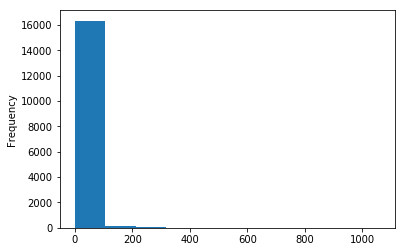

In [54]:
tmp.nn_dist.plot(kind='hist')

In [73]:
from geopy.distance import geodesic, great_circle

In [74]:
# What is the index of the largest nearest neighbor distance
tmp.nn_dist.idxmax()

1

In [78]:
maxidx = tmp.iloc[1]
print(maxidx)
print(maxidx.latitude, maxidx.longitude)

index                                    62904
station_id                         BDM00078016
latitude                               32.3667
longitude                             -64.6833
element                                   PRCP
first_year                                1949
last_year                                 2019
years                                       71
elevation                                  6.1
state                                      NaN
name              L F WADE INTL AP KINDLEY FLD
gsn_flag                                   GSN
hcn_crn_flag                               NaN
wmo_id                                 78016.0
state_name                                 NaN
country_code                                BD
country               Bermuda [United Kingdom]
continent_code                              NA
continent                        North America
type                                         M
nn_dist                                 1059.1
nn_station   

In [79]:
nn = tmp.query('station_id == "USW00093729"')
print(nn.latitude.values[0], nn.longitude.values[0])

35.2325 -75.6219


In [80]:
print(great_circle((maxidx.latitude, maxidx.longitude), (nn.latitude.values[0], nn.longitude.values[0])).km)

1059.0999368442672


In [81]:
# Consider a more efficient version of nearest neighbor distance
def get_nearest_neighbor_distance_2(data_frame):
    """
    For each station, find the closest station using geodesic distance.  Returns a 
    copy of the df with added columns `nn_dist` and `nn_station`.
    """
    #
    nn_dist = []
    nn_station = []
    num_rows = data_frame.shape[0]
    
    ball_tree = BallTree(np.deg2rad(data_frame[['latitude', 'longitude']].values), metric='haversine')

    for row in range(num_rows):
        
        # The query point is the point dropped from the tree
        query_lat = [data_frame.latitude[row]]
        query_lon = [data_frame.longitude[row]]
        
        # Find the first two nearest neighbors
        # The first nearest neighbor will be the point itself
        # The second nearest neighbor will be the next point distinct from the query point
        distance, index = ball_tree.query(np.deg2rad(np.c_[query_lat, query_lon]), k=2)
        
        distance = distance[0, 1] * 6371000/1000  # multiply by Earth radius to get kilometers
        index = index[0, 1]
        nn_station.append(data_frame.station_id.iloc[index])
        nn_dist.append(distance)
            
    df_copy = data_frame.copy()
    df_copy['nn_dist'] = nn_dist
    df_copy['nn_station'] = nn_station
    return df_copy

In [82]:
tmp2 = get_nearest_neighbor_distance_2(tmax_1980_na)

In [83]:
tmp2.head()

,index,station_id,latitude,longitude,element,first_year,last_year,years,elevation,state,...,hcn_crn_flag,wmo_id,state_name,country_code,country,continent_code,continent,type,nn_dist,nn_station
0,62846,BB000078954,13.0670,-59.4830,PRCP,1973,2018,46,52.0,NaN,...,NaN,78954.0,NaN,BB,Barbados,NA,North America,0,235.901471,MBM00078925
1,62904,BDM00078016,32.3667,-64.6833,PRCP,1949,2019,71,6.1,NaN,...,NaN,78016.0,NaN,BD,Bermuda [United Kingdom],NA,North America,M,1059.098441,USW00093729
2,62957,BF000078073,25.0500,-77.4670,PRCP,1973,2019,47,5.0,NaN,...,NaN,78073.0,NaN,BF,"Bahamas, The",NA,North America,0,280.677978,USW00092811
3,63161,BHM00078583,17.5390,-88.3080,PRCP,1960,2019,60,4.6,NaN,...,NaN,78583.0,NaN,BH,Belize,NA,North America,M,83.597342,MXN00023018
4,70701,CA001010235,48.4000,-123.4833,PRCP,1971,1995,25,17.0,BC,...,NaN,NaN,BRITISH COLUMBIA,CA,Canada,NA,North America,0,4.131491,CA001015107


In [84]:
# Are the methods returning the same results?
tmp.equals(tmp2)

False

In [89]:
# They are returning the same nearest neighbor distances...
np.where(tmp.nn_dist != tmp2.nn_dist)

(array([], dtype=int64),)

In [90]:
# But they are identifying different stations as the nearest neighbors in some cases
np.where(tmp.nn_station != tmp2.nn_station)

(array([   46,    59,   106,   111,   130,   272,   275,   277,   293,
          330,   331,   339,   358,   364,   368,   371,   376,   379,
          381,   431,   432,   468,   492,   499,   583,   649,   651,
          655,   665,   703,   710,   716,   719,   742,  1000,  1002,
         1019,  1051,  1094,  1109,  1111,  1161,  1163,  1634,  1639,
         1641,  1720,  1721,  1725,  1729,  1902,  2034,  2035,  2039,
         2171,  2261,  2268,  2314,  2543,  2570,  2585,  2591,  2760,
         2788,  2842,  2931,  2942,  3003,  3006,  3016,  3024,  3045,
         3178,  3208,  3330,  3350,  3359,  3382,  3434,  3549,  3561,
         3573,  3608,  3628,  3632,  3663,  3697,  3702,  3737,  3751,
         3769,  3781,  3790,  3795,  3796,  3808,  3811,  3827,  3835,
         3848,  3850,  3896,  3900,  3953,  3964,  3981,  4041,  4048,
         4094,  4105,  4149,  4176,  4205,  4250,  4295,  4311,  4372,
         4394,  4422,  4570,  4618,  4626,  4639,  4682,  4726,  4738,
      

In [91]:
# Let's look at row 46
tmp.iloc[46]

index                            71256
station_id                 CA001018614
latitude                       48.4667
longitude                       -123.3
element                           PRCP
first_year                        1959
last_year                         1983
years                               25
elevation                           43
state                               BC
name              VICTORIA GORDON HEAD
gsn_flag                           NaN
hcn_crn_flag                       NaN
wmo_id                             NaN
state_name            BRITISH COLUMBIA
country_code                        CA
country                         Canada
continent_code                      NA
continent                North America
type                                 0
nn_dist                        2.45515
nn_station                 CA001018FF6
Name: 46, dtype: object

In [92]:
# We see that the nearest neighbor is different but the distance is the same
tmp2.iloc[46]

index                            71256
station_id                 CA001018614
latitude                       48.4667
longitude                       -123.3
element                           PRCP
first_year                        1959
last_year                         1983
years                               25
elevation                           43
state                               BC
name              VICTORIA GORDON HEAD
gsn_flag                           NaN
hcn_crn_flag                       NaN
wmo_id                             NaN
state_name            BRITISH COLUMBIA
country_code                        CA
country                         Canada
continent_code                      NA
continent                North America
type                                 0
nn_dist                        2.45515
nn_station                 CA00101QF57
Name: 46, dtype: object

In [95]:
# How far are the two different nearest neighbors from the target point?
pt1 = tmp.iloc[46]
pt2 = tmp.query('station_id == "CA001018FF6"') # nearest neighbor found by method 1 - new ball tree each time - 1 nn
pt3 = tmp.query('station_id == "CA00101QF57"') # nearest neighbor found by method 2 - 1 ball tree - find 2 nn

print(great_circle((pt1.latitude, pt1.longitude), (pt2.latitude.values[0], pt2.longitude.values[0])).km)
print(great_circle((pt1.latitude, pt1.longitude), (pt3.latitude.values[0], pt3.longitude.values[0])).km)

2.4551584077400075
2.4551584077400075


In [96]:
# How close are the two nearest neighbors to each other?
print(great_circle((pt2.latitude.values[0], pt2.longitude.values[0]), (pt3.latitude.values[0], pt3.longitude.values[0])).km)

0.0


In [97]:
pt2

,index,station_id,latitude,longitude,element,first_year,last_year,years,elevation,state,...,hcn_crn_flag,wmo_id,state_name,country_code,country,continent_code,continent,type,nn_dist,nn_station
53,71330,CA001018FF6,48.4667,-123.3333,PRCP,1974,1988,15,68.0,BC,...,NaN,NaN,BRITISH COLUMBIA,CA,Canada,NA,North America,0,0.0,CA00101QF57


In [99]:
pt3

,index,station_id,latitude,longitude,element,first_year,last_year,years,elevation,state,...,hcn_crn_flag,wmo_id,state_name,country_code,country,continent_code,continent,type,nn_dist,nn_station
59,71397,CA00101QF57,48.4667,-123.3333,PRCP,1964,1991,28,49.0,BC,...,NaN,NaN,BRITISH COLUMBIA,CA,Canada,NA,North America,0,0.0,CA001018FF6


In [101]:
# Within the precision of latitude, longitude given, there are stations with the same coordinates.

In [105]:
tmp.nn_dist.describe().to_dict()

{'count': 16495.0,
 'mean': 16.761432301481996,
 'std': 23.125801164969648,
 'min': 0.0,
 '25%': 7.4746831961736095,
 '50%': 13.26492038562102,
 '75%': 20.702248377786553,
 'max': 1059.0984407077165}

In [123]:
def compute_nn_dist_summaries(data_frame, element, continent, min_year, max_year=2019):
    results = []
    
    for year in range(min_year, max_year+1):
        # get the data frame:
        df = query_by_year_and_element(data_frame, year, element, continent)
        nn_df = get_nearest_neighbor_distance_2(df)
        stats = nn_df.nn_dist.describe().to_dict()
        stats['year'] = year
        results.append(stats)
        
    return pd.DataFrame(results)

In [124]:
compute_nn_dist_summaries(df, 'PRCP', 'North America', 1980, 1980) # should match the output above...

,25%,50%,75%,count,max,mean,min,std,year
0,7.474683,13.26492,20.702248,16495.0,1059.098441,16.761432,0.0,23.125801,1980


In [111]:
%timeit -n1 compute_nn_dist_summaries(df, 'PRCP', 'North America', 1980, 1980)

9.35 s ± 102 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [112]:
min(df[(df.continent == 'North America') & (df.element == 'PRCP')].first_year)

1836

In [115]:
def find_first_year(data_frame, element, continent):
    return min(df[(df.continent == continent) & (df.element == element)].first_year)

In [116]:
find_first_year(df, 'PRCP', 'South America')

1901

In [118]:
na_prcp_nn = compute_nn_dist_summaries(df, 'PRCP', 'North America', 1860, 2019)

In [120]:
na_prcp_nn['year'] = [x for x in range(1860, 2020)]

In [121]:
na_prcp_nn.head()

,25%,50%,75%,count,max,mean,min,std,year
0,151.209602,314.535351,620.474620,19.0,798.457964,363.058299,0.212859,289.421344,1860
1,151.209602,314.535351,620.474620,19.0,798.457964,363.058299,0.212859,289.421344,1861
2,151.209602,314.535351,620.474620,19.0,798.457964,363.058299,0.212859,289.421344,1862
3,8.571804,252.930384,518.261723,20.0,798.457964,308.004351,0.212859,285.133612,1863
4,8.571804,252.930384,518.261723,20.0,798.457964,308.004351,0.212859,285.133612,1864


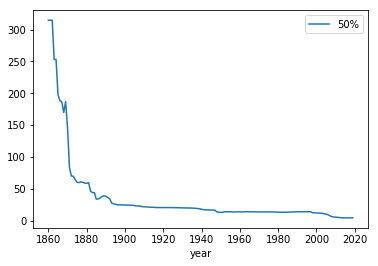

In [122]:
na_prcp_nn.plot(x='year', y='50%')

In [125]:
eu_prcp_nn = compute_nn_dist_summaries(df, 'PRCP', 'Europe', 1860, 2019)

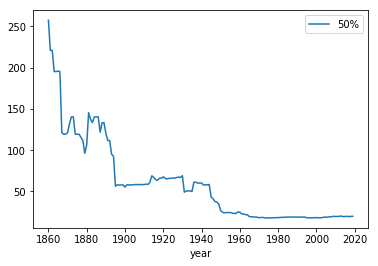

In [126]:
eu_prcp_nn.plot(x='year', y='50%')

In [127]:
af_prcp_nn = compute_nn_dist_summaries(df, 'PRCP', 'Africa', 1860, 2019)

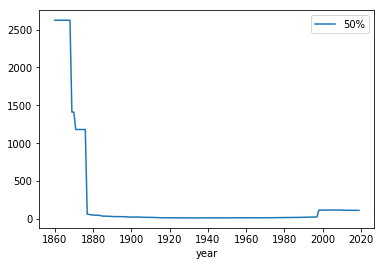

In [128]:
af_prcp_nn.plot(x='year', y='50%')

In [130]:
find_first_year(df, 'PRCP', 'Asia')

1881

In [131]:
as_prcp_nn = compute_nn_dist_summaries(df, 'PRCP', 'Asia', 1881, 2019)

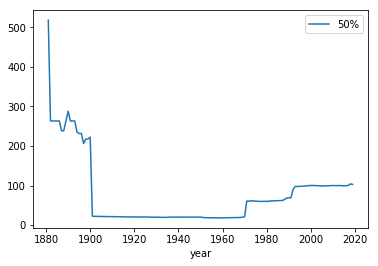

In [132]:
as_prcp_nn.plot(x='year', y='50%')

In [133]:
sa_prcp_nn = compute_nn_dist_summaries(df, 'PRCP', 'South America', 1901, 2019)

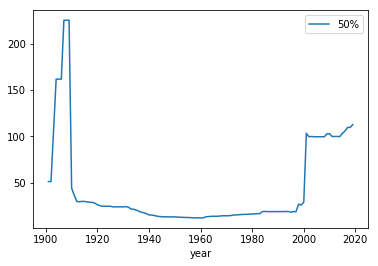

In [134]:
sa_prcp_nn.plot(x='year', y='50%')

In [135]:
oc_prcp_nn = compute_nn_dist_summaries(df, 'PRCP', 'Oceania', 1860, 2019)

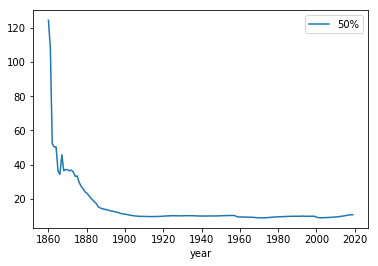

In [136]:
oc_prcp_nn.plot(x='year', y='50%')

In [137]:
find_first_year(df, 'PRCP', 'Antartica')

1956

In [138]:
an_prcp_nn = compute_nn_dist_summaries(df, 'PRCP', 'Antartica', 1956, 2019)

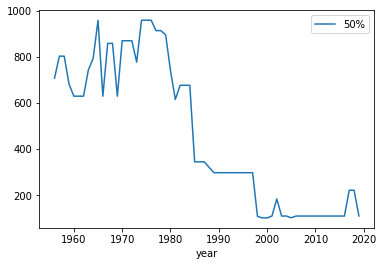

In [139]:
an_prcp_nn.plot(x='year', y='50%')

In [145]:
# Make a dictionary of data frames for passing into a plotting function:
data_frame_dict = {'Antartica': an_prcp_nn, 'Africa': af_prcp_nn, 'Asia': as_prcp_nn,\
                  'Europe': eu_prcp_nn, 'North America': na_prcp_nn, 'Oceania': oc_prcp_nn,\
                  'South America': sa_prcp_nn}

In [142]:
continents = ['Africa', 'Antartica', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
color_dict = {"Africa" : "blue", "Antartica" : "orange", "Asia" : "green", "Europe" : "red",\
              "North America": "purple", "Oceania": "brown", "South America": "pink"}

In [152]:
def plot_nn_dist (df_dict, min_year, xlabel, ylabel, continents, colors, title, filename, img_path=IMG_PATH):
    """ Plot a line plot for the median nearest neighbor distance for each continent:
    
    Args:
        df_dict: a dictionary of DataFrames of summary statistics of the nearest neighbor distance by year 
        continents: a list of continent names to be used in the plot.
        colors: a dict of the form {"continent" : "color"} for plotting
        xlabel: a string for the xlabel
        ylabel: a string for the ylabel
        title: a string for the title
        filename: a file for saving the figure
    
    Returns:
        the return values of the plt.subplots() function
    """
    if not os.path.isdir(img_path):
        os.makedirs(img_path)

    fig, ax = plt.subplots(figsize=(10,8))
    plt.rcParams.update({'font.size': 14})

    for continent in continents:
        df = df_dict[continent]
        df = df[df.year >= min_year]
        q1_nn = df['25%']
        med_nn = df['50%']
        q3_nn = df['75%']
        x_axis = df.year

        ax.plot(x_axis, med_nn,\
                #linestyle="--", linewidth=0.5,\
                color=colors[continent],\
                #alpha=0.7,\
                label=continent)
        ax.plot(x_axis, q1_nn,\
                #linestyle="--", linewidth=0.5,\
                color=colors[continent],\
                #alpha=0.7,\
                )
        ax.plot(x_axis, q3_nn,\
                #linestyle="--", linewidth=0.5,\
                color=colors[continent],\
                #alpha=0.7,\
                )
        
    #ax.set_xlim(-5, len(counts)+10)
    #ax.set_xlim(1781,2019)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.grid(which='major')
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    
    plt.legend(loc="best", fontsize="medium", fancybox=True)

    #plt.show()
    #labels =  [item.get_text() for item in ax.get_xticklabels()]
    #print(labels)
    #labels[-2] = '2021'
    #print(labels)
    #ax.set_xticklabels(labels)
    
    output_file = os.path.join(img_path, filename)
    fig.savefig(output_file)
    plt.show()

    return fig, ax


In [155]:
def plot_nn_dist_med (df_dict, xlabel, ylabel, continents, colors, title, filename, img_path=IMG_PATH):
    """ Plot a line plot for the median nearest neighbor distance for each continent:
    
    Args:
        df_dict: a dictionary of DataFrames of summary statistics of the nearest neighbor distance by year 
        continents: a list of continent names to be used in the plot.
        colors: a dict of the form {"continent" : "color"} for plotting
        xlabel: a string for the xlabel
        ylabel: a string for the ylabel
        title: a string for the title
        filename: a file for saving the figure
    
    Returns:
        the return values of the plt.subplots() function
    """
    if not os.path.isdir(img_path):
        os.makedirs(img_path)

    fig, ax = plt.subplots(figsize=(10,8))
    plt.rcParams.update({'font.size': 14})

    for continent in continents:
        df = df_dict[continent]
        #df = df[df.year >= min_year]
        #q1_nn = df['25%']
        med_nn = df['50%']
        #q3_nn = df['75%']
        x_axis = df.year

        ax.plot(x_axis, med_nn,\
                #linestyle="--", linewidth=0.5,\
                color=colors[continent],\
                #alpha=0.7,\
                label=continent)
        #ax.plot(x_axis, q1_nn,\
        #        #linestyle="--", linewidth=0.5,\
        #        color=colors[continent],\
        #        #alpha=0.7,\
        #        )
        #ax.plot(x_axis, q3_nn,\
        #        #linestyle="--", linewidth=0.5,\
        #        color=colors[continent],\
        #        #alpha=0.7,\
        #        )
        
    #ax.set_xlim(-5, len(counts)+10)
    #ax.set_xlim(1781,2019)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.grid(which='major')
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    
    plt.legend(loc="best", fontsize="medium", fancybox=True)

    #plt.show()
    #labels =  [item.get_text() for item in ax.get_xticklabels()]
    #print(labels)
    #labels[-2] = '2021'
    #print(labels)
    #ax.set_xticklabels(labels)
    
    output_file = os.path.join(img_path, filename)
    fig.savefig(output_file)
    plt.show()

    return fig, ax


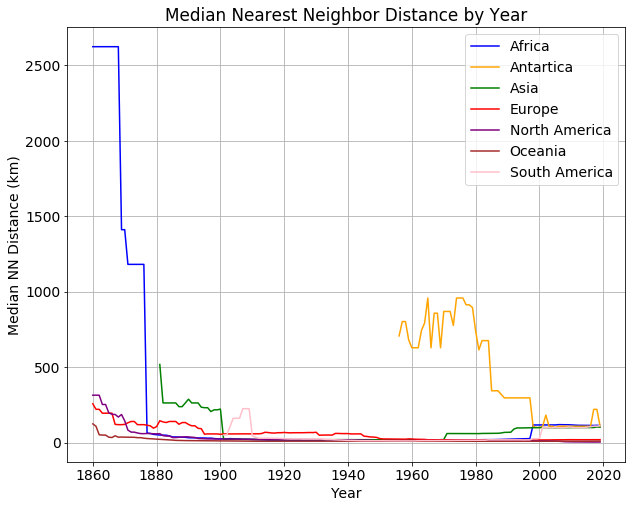

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2be6b0fd240>)

In [156]:
plot_nn_dist_med(data_frame_dict, "Year", "Median NN Distance (km)", continents, color_dict,\
            "Median Nearest Neighbor Distance by Year", "med_nn_dist")

In [149]:
for key in data_frame_dict.keys():
    results_2018 = data_frame_dict[key].query('year == 2018')
    print(f"{key}:  {results_2018['50%'].values[0]} (km)")

Antartica:  220.63697162714828 (km)
Africa:  114.88022145534026 (km)
Asia:  104.19306869651001 (km)
Europe:  19.80597454454378 (km)
North America:  4.285371615980454 (km)
Oceania:  10.56079620166649 (km)
South America:  109.53931374599267 (km)


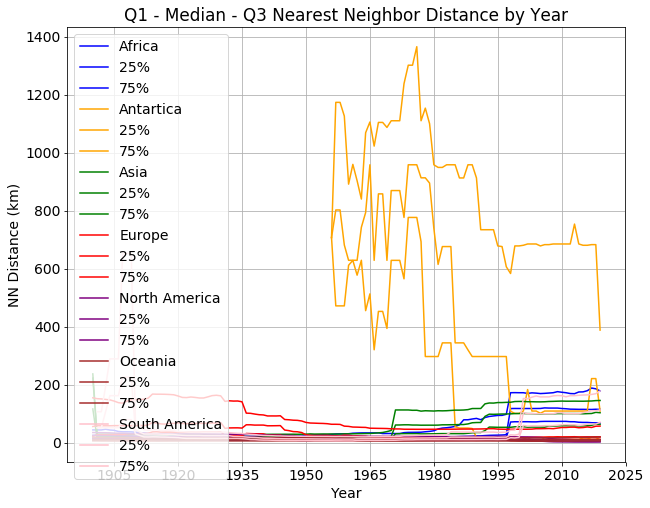

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2be643ddcf8>)

In [154]:
plot_nn_dist(data_frame_dict, 1900, "Year", "NN Distance (km)", continents, color_dict,\
            "Q1 - Median - Q3 Nearest Neighbor Distance by Year", "iqr_nn_dist")